## GPA205-0930: Beer Consumption - São Paulo

**Martin Kaplan**

**Josep Maria Domingo Catafal**

# Apartat (C): Analitzant Dades
El primer de tot que hem de fer és analitzar la base de dades. Per fer-ho ens ajudarem d'una sèrie de llibreries que ens permeten carregar i visualitzar les dades.

In [1]:
from pandas.io.formats import style
from scipy.sparse import data
import scipy.stats
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer
from sklearn.decomposition import PCA

pd.set_option('display.float_format', lambda x: '%.3f' % x)

Un cop importades les llibreries podem llegir el dataset i utilitzant la funció 'dropna()' eliminem els valors nuls i NaN. Després, guardem les dades del DataFrame en una variable a part, per així poder-les manipular de forma més fàcil.

In [2]:
dataset = pd.read_csv('dataset.csv', decimal=',').dropna()
data = dataset.values

Utilitzant les funcions 'head()' i 'tail()' podem veure una mostra de les nostres dades, i agafar una idea del que contenen i veure si estan ordenades d'una manera en concret.

In [3]:
dataset.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.300,23.900,32.500,0.000,0.000,25.461
1,2015-01-02,27.020,24.500,33.500,0.000,0.000,28.972
2,2015-01-03,24.820,22.400,29.900,0.000,1.000,30.814
3,2015-01-04,23.980,21.500,28.600,1.200,1.000,29.799
4,2015-01-05,23.820,21.000,28.300,0.000,0.000,28.900


In [4]:
dataset.tail()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
360,2015-12-27,24.000,21.100,28.200,13.600,1.000,32.307
361,2015-12-28,22.640,21.100,26.700,0.000,0.000,26.095
362,2015-12-29,21.680,20.300,24.100,10.300,0.000,22.309
363,2015-12-30,21.380,19.300,22.400,6.300,0.000,20.467
364,2015-12-31,24.760,20.200,29.000,0.000,0.000,22.446


Observant aquesta informació podem concloure que les columnes tenen el següent significat:

- **Data**: Data en la qual es va registrar l'entrada.
- **Temperatura Media**: Temperatura mitjana del dia en el qual es va registrar l'entrada (en Celsius).
- **Temperatura Mínima**: Temperatura mínima del dia en el qual es va registrar l'entrada (en Celsius).
- **Temperatura Màxima**: Temperatura màxima del dia en el qual es va registrar l'entrada (en Celsius).
- **Precipitacao**: Mil·límetres de precipitació registrats el dia en el qual es va registrar l'entrada.
- **Final de Semana**: Un 0 indica que no es entre setmana, un 1 que és cap de setmana.
- **Consumo de cerveja**: Litres de cervesa consumits en el dia en el qual es va registrar l'entrada.

Per facilitarnos la vida, traduirem els noms de les columnes a l'anglès i amb '_' en comptes d'espais

In [5]:
dataset.columns = ['date', 'avg_temp', 'min_temp', 'max_temp', 'precipitation', 'weekend', 'consumption_liters']

Hi ha un petit problema amb les dades, i és que el separador decimal es una coma en totes les columnes menys en la del consum de cervesa. Per resoldre aquesta inconsistencia, el que fem és, al llegir el csv em especificat que el separador decimal es la coma, i ara només ens falta convertir la columna del consum de cervesa a float.

In [6]:
dataset['consumption_liters'] = pd.to_numeric(dataset['consumption_liters'])

Una altra cosa que ens pot resultar d'utilitat és calcular les estadístiques dels atributs numèrics del dataset.

In [7]:
dataset.describe()

,avg_temp,min_temp,max_temp,precipitation,weekend,consumption_liters
count,365.000,365.000,365.000,365.000,365.000,365.000
mean,21.226,17.461,26.612,5.197,0.285,25.401
std,3.180,2.826,4.317,12.418,0.452,4.399
min,12.900,10.600,14.500,0.000,0.000,14.343
25%,19.020,15.300,23.800,0.000,0.000,22.008
50%,21.380,17.900,26.900,0.000,0.000,24.867
75%,23.280,19.600,29.400,3.200,1.000,28.631
max,28.860,24.500,36.500,94.800,1.000,37.937


Un cop tenim una idea de com estan estructurades les dades i del que representen podem decidir quin serà l'atribut objectiu. Ens hem decantat pel consum de cervesa en litres, ja que conté una bona variabilitat de les dades i és la de més interès respecte a la correlació de les dades, ja que no tindria massa sentit, per exemple, intentar preveure la temperatura en funció de la cervesa que veu la gent. És més aviat al contrari, volem veure la predisposició que té la gent a beure cervesa en funció de la temperatura.
Un cop escollit l'atribut objectiu, el següent pas és representar les dades gràficament per entendre millor com es relacionen entre elles i comprendre-les numèricament de manera que ens puguin donar una noció de per on encaminar-nos.

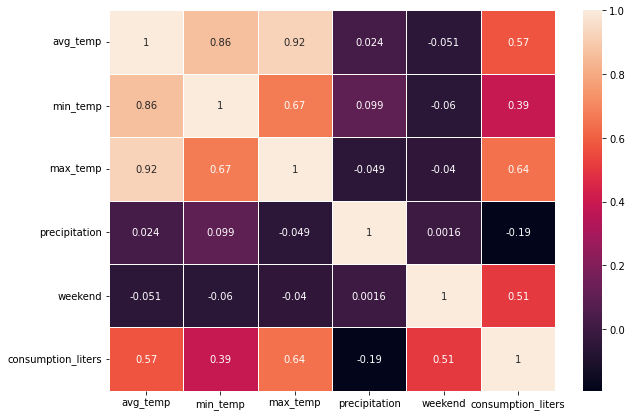

In [8]:
plt.figure(figsize = (10, 7))
ax = sns.heatmap(dataset.corr(), annot=True, linewidths=.5)

Podem veure que sembla que hi hagi una correlació entre la temperatura mitjana i la temperatura màxima i la consumició de cervesa.
Una altra correlació que ens pot resultar interessant és la del consum de cervesa i cap de setmana. El problema que tenim és que hi ha molts més dies laborals que de cap de setmana i per tant obtenim un nombre major de consum de cervesa en dies laborals, tot i que proporcionalment no és cert, com veurem més endavant.

En la següent gràfica podem observar la gran diferència entre els litres de cervesa consumits en dies laborals i en cap de setmana.

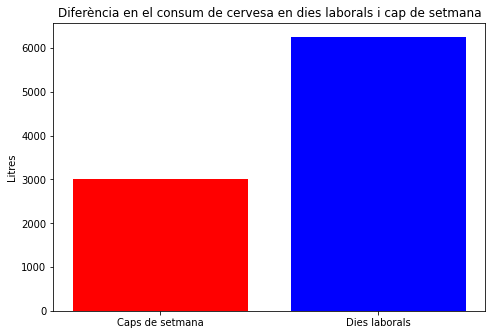

In [9]:
weekends_liters = sum(dataset[dataset.weekend == 1]['consumption_liters'])
weekdays_liters = sum(dataset[dataset.weekend == 0]['consumption_liters'])

fig = plt.figure()
labels = ["Caps de setmana", "Dies laborals"]

ax = fig.add_axes([0,0,1,1])
ax.bar(labels, [weekends_liters, weekdays_liters], color=["r", "b"])

plt.title("Diferència en el consum de cervesa en dies laborals i cap de setmana", figure=fig)
plt.ylabel("Litres", figure=fig)

plt.show()

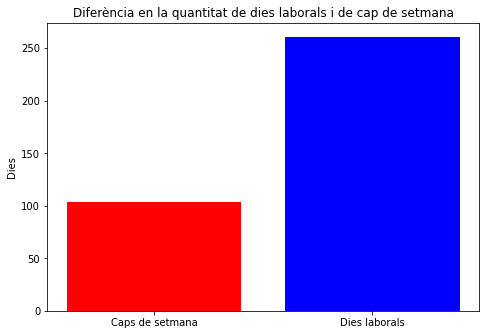

In [10]:
weekends_liters = len(dataset[dataset.weekend == 1])
weekdays_liters = len(dataset[dataset.weekend == 0])

fig = plt.figure()
labels = ["Caps de setmana", "Dies laborals"]

ax = fig.add_axes([0,0,1,1])
ax.bar(labels, [weekends_liters, weekdays_liters], color=["r", "b"])

plt.title("Diferència en la quantitat de dies laborals i de cap de setmana", figure=fig)
plt.ylabel("Dies", figure=fig)

plt.show()

Per solucionar aquest problema, el que podem fer és mirar el consum individualment en cada dia de la setmana. Per poder-ho fer, primer hem de convertir l'atribut date de string a DateTime, per així poder extreure'n el dia de la setmana.

In [11]:
dataset['date'] = pd.to_datetime(dataset['date'])

Un cop fet això creem l'atribut del dia de la setmana. Ja que hi estem posats, també creem un camp mes, que ens pot resultar d'utilitat més endevant.

In [12]:
dataset['month'] = dataset['date'].apply(lambda x: x.strftime('%B'))
dataset['day'] = dataset['date'].apply(lambda x: x.strftime('%A'))
dataset.head()

,date,avg_temp,min_temp,max_temp,precipitation,weekend,consumption_liters,month,day
0,2015-01-01,27.300,23.900,32.500,0.000,0.000,25.461,January,Thursday
1,2015-01-02,27.020,24.500,33.500,0.000,0.000,28.972,January,Friday
2,2015-01-03,24.820,22.400,29.900,0.000,1.000,30.814,January,Saturday
3,2015-01-04,23.980,21.500,28.600,1.200,1.000,29.799,January,Sunday
4,2015-01-05,23.820,21.000,28.300,0.000,0.000,28.900,January,Monday


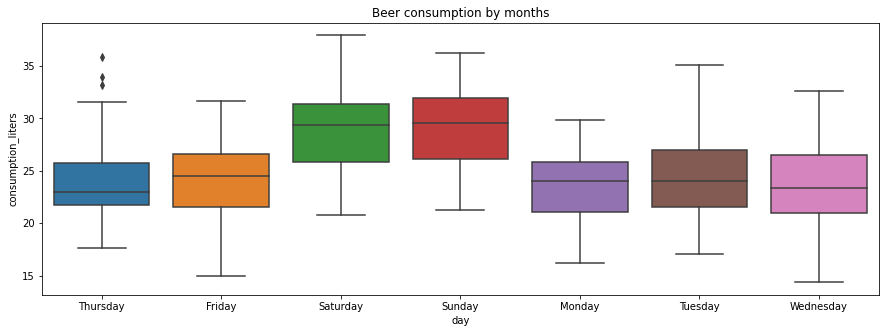

In [13]:
plt.figure(figsize=(15, 5))
plt.title("Beer consumption by months")
ax = sns.boxplot(data=dataset, x = "day", y = "consumption_liters")
plt.show()

Com podem observar que, com ja havíem suposat, el punt de vista des d'on estàvem observant les dades ens estava mentint. Els dies del cap de setmana hi ha un increment en els litres de cervesa consumits, però no s'estava reflectint en les dades, ja que hi ha més dies laborals que de cap de setmana.

Ara podem comprovar, utilitzant el mateix mètode, si hi ha una relació entre els litres de cervesa i el mes de l'any.

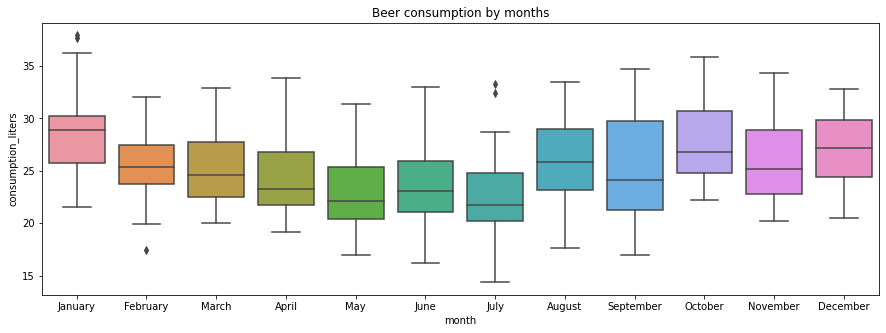

In [14]:
plt.figure(figsize=(15, 5))
plt.title("Beer consumption by months")
ax = sns.boxplot(data=dataset, x = "month", y = "consumption_liters")
plt.show()

Podem veure que, tal com hem vist anteriorment en el heatmap, hi ha una correlació positiva entre els mesos on fa més calor i el consum de cervesa, és a dir en els mesos més calorosos es consumeix més cervesa. Cal tenir en compte que les dades són del Brasil, que és a l'hemisferi sud, i per tant fa calor en els mesos quan fa fred a l'hemisferi nord.

I que en podem dir de la pluja? Afecta el consum de cervesa? Si observem el heatmap que hem generat anteriorment veiem que hi ha una correlació de -0,19 entre el consum de cervesa i la precipitació acumulada. Això vol dir que el fet que plogui fa que la gent prengui menys cervesa, tot i que en molt petita mesura, tan petita que arriba a ser irrellevant.

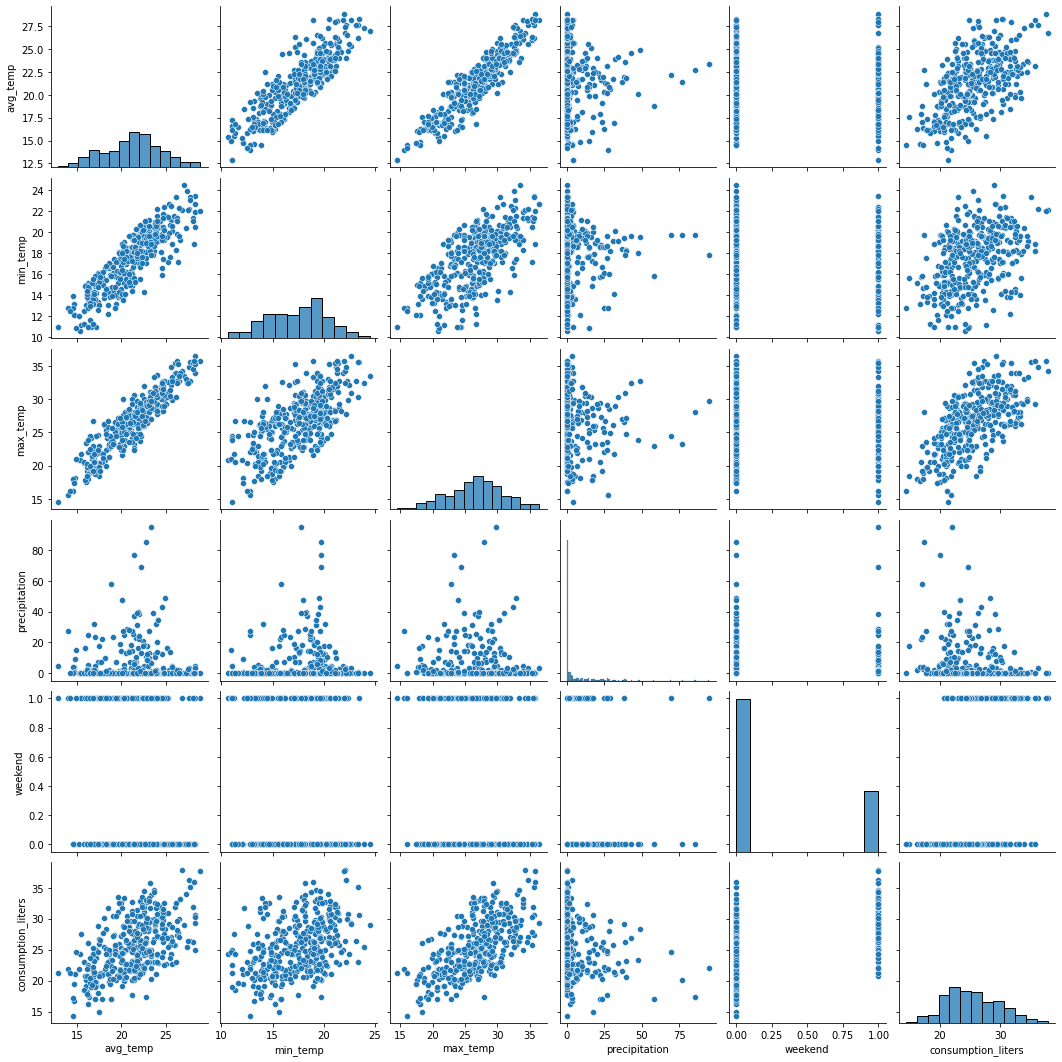

In [15]:
sns.pairplot(dataset)
plt.show()

**1. Quin és el tipus de cada atribut?**

Tots els atributs són floats menys el de cap de setmana que és un boolea.

**2. Quins atributs tenen una distribució Gaussiana?**

Observant els histogrames en la diagonal del "pair plot", podem veure que tots els atributs menys els de precipitació i cap de setmana segueixen una distribució Gaussiana.

**3. Quin és l'atribut objectiu? Per què?**

L'atribut objectiu, com hem esmentat al principi serà el consum de cervesa en litres. És l'atribut objectiu, ja que és l'única de les dades que té una correlació directa amb altres atributs. Les altres relacions que podem trobar entre les dades no ens interessen perquè no tenen una relació directa (per exemple no plou perquè la gent beguí més cervesa, però poder sí que la gent veu menys cervesa quan plou).

# Apartat (B): Primeres regressions

Primer de tot podem crear una funció que ens apliqui la regressió lineal.

In [16]:
def apply_linear_regression(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return model

Definirem també una funció que ens permetrà fer un scatter plot del model un cop entrenat.

In [17]:
def plot_model(predictions, y_test, title = ""):
    _, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(title)
    ax.set_xlabel("Valor Reals")
    ax.set_ylabel("Valor Predits")
    ax.scatter(predictions, y_test)
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", color="r")
    plt.show()

Per tal de poder fer servir els atributs de mes i dia, els hem de codificar, ja que no tenen un format numèric

In [18]:
label_encoder = LabelEncoder()
dataset['month'] = label_encoder.fit_transform(dataset['month'])
dataset['day'] = label_encoder.fit_transform(dataset['day'])

Seleccionem la X i la y. Excloem l'atribut *date*, ja que no ens aporta cap valor a la regressió.

In [19]:
X, y = dataset.drop(['consumption_liters', 'date'], axis=1), dataset['consumption_liters']

Fem la partició de *train* i *test*.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Ara el primer que farem és una regressió entre cada atribut i "consumption_litres", per veure quin d'ells ens aporta uns millors resultats a la regressió.

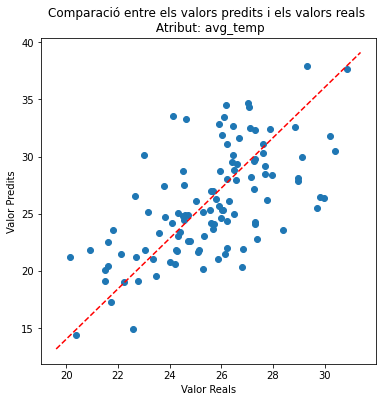

Mean squeared error: 13.829228998306284
R2 score: 0.3659842919345526



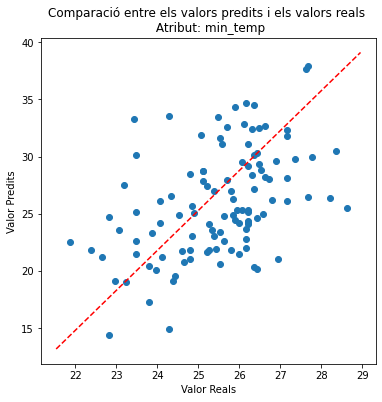

Mean squeared error: 18.000285338401223
R2 score: 0.1747577789329927



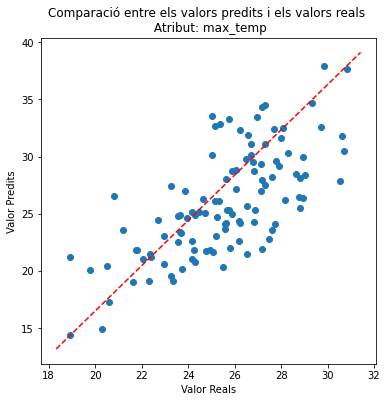

Mean squeared error: 11.776035045697643
R2 score: 0.46011515185583196



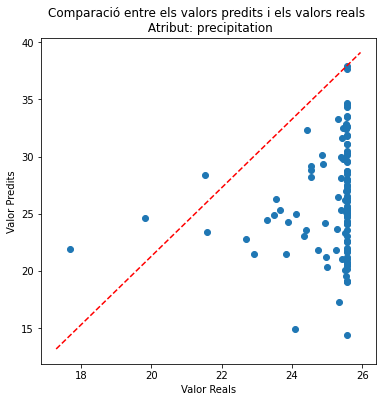

Mean squeared error: 22.37671971172354
R2 score: -0.02588450838061984



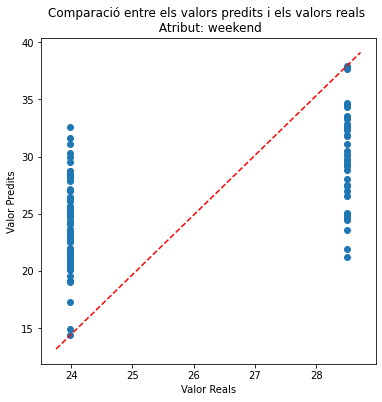

Mean squeared error: 15.14807574279411
R2 score: 0.3055203606019623



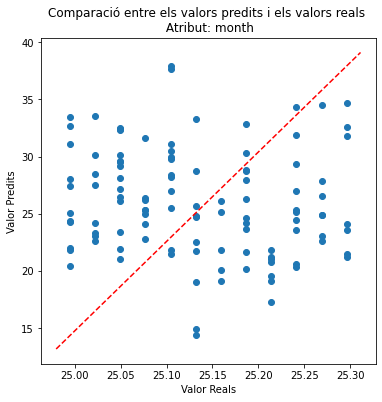

Mean squeared error: 22.65235632047189
R2 score: -0.038521361793470765



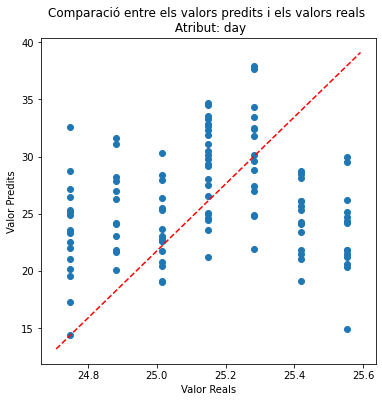

Mean squeared error: 22.373041120680305
R2 score: -0.025715859462791757



In [21]:
for attr in X_train.columns:
    # Train the model
    # we need to reshape the arrays into a 2d arrays for the linear regression
    model = apply_linear_regression(
        X_train[attr].values.reshape(-1, 1),
        y_train.values.reshape(-1, 1)
    )

    # Test the model
    predictions = model.predict(
        X_test[attr].values.reshape(-1, 1)
    )

    plot_model(predictions, y_test, "Comparació entre els valors predits i els valors reals \n Atribut: " + attr)

    print(f"Mean squeared error: {mean_squared_error(y_test, predictions)}")
    print(f"R2 score: {r2_score(y_test, predictions)}\n")

Com podem observar en les gràfiques anteriors, els resultats no són gaire bons, excepte en el cas dels atributs de temperatura, ja que, com hem vist abans tenen una gran correlació amb el consum de cervesa. Sobretot l'atribut temperatura màxima, que és el que ens dona l'error menor (11.77).

Ara el que farem es aplicar la regressió però ja amb tots els atributs, i així poder obtenir els millors resultats.

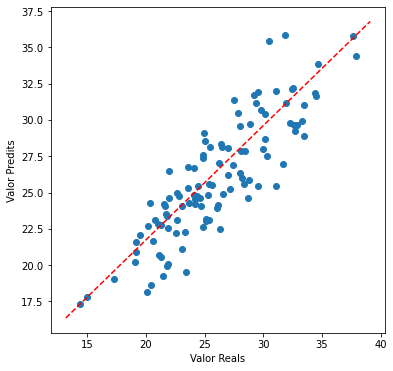

Mean squeared error: 5.585478970063605
R2 score: 0.7439277775700109



In [22]:
X, y = dataset.drop(['consumption_liters', 'date'], axis=1), dataset['consumption_liters']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = apply_linear_regression(X_train, y_train)

# Test the model
predictions = model.predict(X_test)

plot_model(y_test, predictions)
print(f"Mean squeared error: {mean_squared_error(y_test, predictions)}")
print(f"R2 score: {r2_score(y_test, predictions)}\n")

Ara en utilitzar més atributs, ens dona un error molt menor, i la regressió en brinda millors resultats.

Podem provar d'estandarditzar les dades a veure si obtenim alguna millora

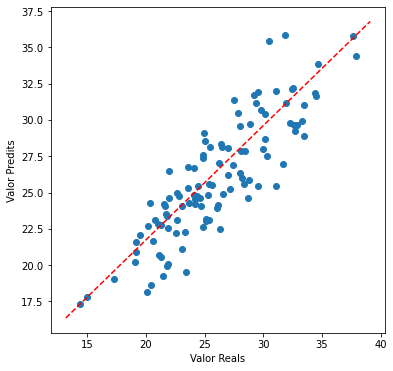

Mean squeared error: 5.585478970063583
R2 score: 0.7439277775700119



In [23]:
X, y = dataset.drop(['consumption_liters', 'date'], axis=1), dataset['consumption_liters']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = apply_linear_regression(X_train, y_train)

# Test the model
predictions = model.predict(X_test)

plot_model(y_test, predictions)
print(f"Mean squeared error: {mean_squared_error(y_test, predictions)}")
print(f"R2 score: {r2_score(y_test, predictions)}\n")

Com era d'esperar no hem obtingut gaire millora, ja que les dades estan en un rang molt similar i per tant l'estandardització no afecte gaire.

Ara ho provem normalitzant.

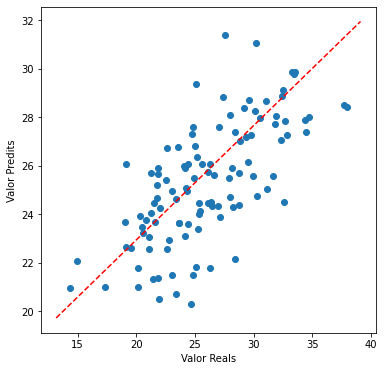

Mean squeared error: 12.64942138597142
R2 score: 0.4200738264130913



In [24]:
X, y = dataset.drop(['consumption_liters', 'date'], axis=1), dataset['consumption_liters']
X = Normalizer().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = apply_linear_regression(X_train, y_train)

# Test the model
predictions = model.predict(X_test)

plot_model(y_test, predictions)
print(f"Mean squeared error: {mean_squared_error(y_test, predictions)}")
print(f"R2 score: {r2_score(y_test, predictions)}\n")

Igual que amb l'estandardització, la normalització no ens ha aportat cap millora, és més, podem observar que ha sigut inclús contraproduent.

Ara el que pot resultar interessant és aplicar PCA (*Principal Component Analysis*). Per fer-ho, utilitzem la funció PCA de la llibreria scikit-learn.

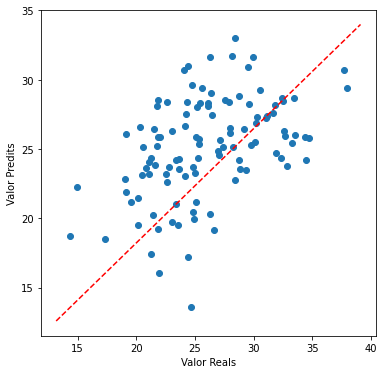

Mean squeared error: 20.423553848889675
R2 score: 0.06366045740493032



In [25]:
X, y = dataset.drop(['consumption_liters', 'date'], axis=1), dataset['consumption_liters']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pca = PCA(n_components="mle")
pca_train = pca.fit_transform(X_train)
pca_test = pca.fit_transform(X_test)

model = apply_linear_regression(pca_train, y_train)
predictions = model.predict(pca_test)

plot_model(y_test, predictions)
print(f"Mean squeared error: {mean_squared_error(y_test, predictions)}")
print(f"R2 score: {r2_score(y_test, predictions)}\n")

A l'aplicar PCA, però, ens està donant pitjors resultats. No hem acabat de trobar una raó en concret, és molt probable que ens estiguem deixant algun pas important o que simplement per les dades que tenim, sigui contraproduent.

**1. Quins són els atributs més importants per fer una bona predicció?**

Els atributs que seran més importants per fer una predicció decent seran determinats per al seu MSE, buscant el que el tingui de menor valor.

**2. Amb quin atribut s'assoleix un MSE menor?**

En el nostre cas els atributs que ens donen menys error són la temperatura mitjana i la temperatura màxima.

**3. Quina correlació hi ha entre els atributs de la vostra base de dades?**

Els atributs de temperatura tenen una correlació alta amb el consum de cervesa, ja que si la temperatura és major, la gent veu més cervesa, sigui per refrescar-se o perquè és quan s'acostumen a fer vacances per tant tenen més temps lliure i s'ho poden permetre.

El dia de la setmana també té una correlació forta amb el consum, ja que la gent veu més en el cap de setmana perquè no ha de treballar l'endemà, el mateix motiu que hem comentat amb els mesos d'estiu.

Respecte a l'atribut de precipitació, no hem observat massa correlació. El fet que plogui no influeix ni positivament ni negativament en el consum de cervesa.

**4. Com influeix la normalització en la regressió?**

Nosaltres no hem vist cap millora, possiblement perquè la majoria de les dades ja estan en un rang molt similar i per tant la normalització no aprota grans canvis.

**5. Com millora la regressió quan es filtren aquells atributs de les mostres que no contenen informació?**

Ja els havíem filtrat al principi per tant no hem notat cap millora. Però assumim que si tens moltes dades nul·les la predicció serà menys eficaç, ja que estarà considerant dades buides com informació per a fer el model.

**6. Si s'aplica un PCA, a quants components es redueix l'espai? Per què?**



# Apartat (A): El descens del gradient

Primer de tot definim una classe Regressor, on hi hem implementat el descens del gradient en la funció "train"

In [26]:
class Regressor(object):
    def __init__(self, X, y, alpha=0.01):
        self.theta = np.zeros(X.shape[1])
        self.alpha = alpha
        self.X = X
        self.y = y
        
    def predict(self, x):
        return x.dot(self.theta)
    
    def train(self, epoch=1000):
        m = self.y.shape[0]
        cost_history = []
        theta_history = []
        
        for i in range(epoch):
            hypothesis = self.X.dot(self.theta)
            loss = hypothesis - self.y

            cost =  np.sum(loss**2) / (2 * m)  # mean_squared_error(self.y, hypothesis) 
            cost_history.append(cost)

            gradient = self.X.T.dot(loss) / m
            self.theta = self.theta - self.alpha * gradient
            theta_history.append(self.theta)

        return self.theta, cost_history, theta_history

En la classe anterior tenim la funció train que és la que implementa l'algorisme del descens del gradient, i la funció predict que a partir dels resultats del train fa les prediccions.

Ara estandarditzem les dades de train i test de X abans de poder passar-les al descens del gradient.

In [27]:
std_X_train = StandardScaler().fit_transform(X_train)
std_X_test = StandardScaler().fit_transform(X_test)

reg = Regressor(std_X_train, y_train, alpha=0.0005)
theta, cost_history, theta_history = reg.train(100000)
predictions = reg.predict(std_X_test)

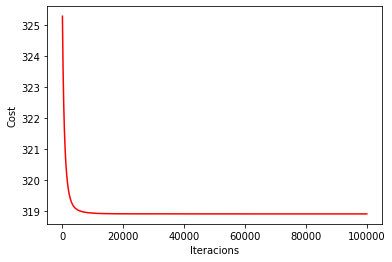

In [28]:
plt.figure()
plt.plot(cost_history, label='Cost history', color='r')
plt.xlabel('Iteracions')
plt.ylabel('Cost')
plt.show()

En el gràfic anterior es mostra l'evolució del cost al llarg de cada iteració. Podem veure que arriba un punt on s'assoleix un mínim i per moltes iteracions més que fem, ja no baixa més, i per tant és la nostra solució.

I aquí podem veure com afecta el valor d'alpha en l'error:

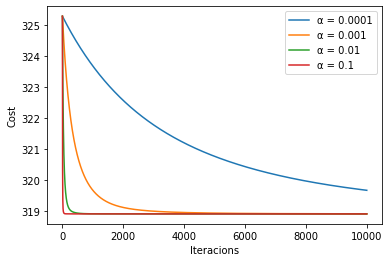

In [29]:
results = []
alpha_values = [0.0001, 0.001, 0.01, 0.1]
for alpha in alpha_values:
    reg = Regressor(std_X_train, y_train, alpha=alpha)
    theta, cost_history, theta_history = reg.train(10000)
    results.append(cost_history)
    predictions = reg.predict(std_X_test)

plt.figure()
for i in range(len(alpha_values)):
    plt.plot(range(1, 10001), results[i], label=f"α = {alpha_values[i]}")
plt.legend()
plt.xlabel('Iteracions')
plt.ylabel('Cost')
plt.show()

Observem que si el valor d'alpha és molt petit, tarda molt en convergir. Mentre que si el valor és massa elevat no convergeix:

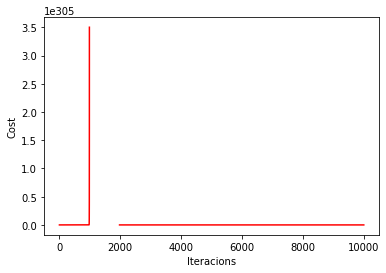

In [30]:
reg = Regressor(std_X_train, y_train, alpha=0.9)
theta, cost_history, theta_history = reg.train(10000)
plt.figure()
plt.plot(cost_history, label='Cost history', color='r')
plt.xlabel('Iteracions')
plt.ylabel('Cost')
plt.show()

El resultat de la regressió ens està brindant bons resultats, com es pot observar en la gràfica següent, però l'error ens està donant un valor molt elevat. Creiem que és perquè a l'hora d'estandarditzar hem fet alguna cosa malament, però no hem sabut trobar el que. A més el R2 score ens està donant negatiu, cosa que ens indica que alguna cosa no estem fent bé.

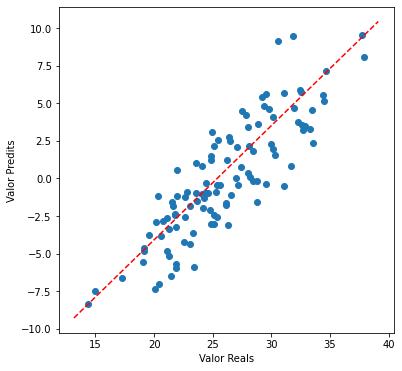

Error mínim: 318.94025186974585
R2 score: -30.211922545049624



In [31]:
reg = Regressor(std_X_train, y_train, alpha=0.0005)
theta, cost_history, theta_history = reg.train(10000)
predictions = reg.predict(std_X_test)

plot_model(y_test, predictions)
print(f"Error mínim: { min(cost_history) }")
print(f"R2 score: { r2_score(y_test, predictions) }\n")